# **Loan Eligibility Prediction using Various ML and DL Techniques**

# **Importing Necessary Packages and Loading The Dataset**

In [128]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [129]:
#Let's Load the data using panda library
data = pd.read_csv('lending_club_loan_two.csv')

In [130]:
#Let's print the first 5 records of the data
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [131]:
#Let's Print the Last 5 records of the dataset 
data.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


### **Let's Understand More About the Data**

#### **Feature Description**

**0. loan_amnt**                - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**1. term**                      - The number of payments on the loan. Values are in months and can be either 36 or 60.

**2. int_rate**                  - Interest Rate on the loan

**3. installment**      - The monthly payment owed by the borrower if the loan originates.

**4.	grade**           -	LC assigned loan grade

**5.	sub_grade**       -	LC assigned loan subgrade

**6.	emp_title**       -	The job title supplied by the Borrower when applying for the loan.*

**7.	emp_length**      - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**8.	home_ownership**  - The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

**9.	annual_inc**      - The self-reported annual income provided by the borrower during registration.

**10.	verification_status** - Indicates if income was verified by LC, not verified, or if the income source was verified

**11.	issue_d** - The month which the loan was funded

**12.	loan_status** - Current status of the loan

**13.	purpose** - A category provided by the borrower for the loan request.

**14.	title** -	The loan title provided by the borrower

**15.	zip_code** -	The first 3 numbers of the zip code provided by the borrower in the loan application.

**16.	addr_state** -	The state provided by the borrower in the loan application

**17.	dti** -	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage 
and the requested LC loan, divided by the borrower’s self-reported monthly income.

**18.	earliest_cr_line** -	The month the borrower's earliest reported credit line was opened

**19.	open_acc** -	The number of open credit lines in the borrower's credit file.

**20.	pub_rec**	 - Number of derogatory public records

**21.	revol_bal** -	Total credit revolving balance

**22.	revol_util** -	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**23.	total_acc** -	The total number of credit lines currently in the borrower's credit file

**24.	initial_list_status** - The initial listing status of the loan. Possible values are – W, F

**25.	application_type** - Indicates whether the loan is an individual application or a joint application with two co-borrowers

**26.	mort_acc** - Number of mortgage accounts.

**27.	pub_rec_bankruptcies** - 	Number of public record bankruptcies

In [132]:
#Printing the shape of the dataset 
data.shape

(396030, 27)

**Here we have 396030 observations with 27 features in our dataset**

In [133]:
#Getting the data types of all the columns
data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

**Here in our dataset we have both object and float data types.**

In [134]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
data.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan

In [135]:
#Here is the unique values in our data 
print("The unique values in each and every column in our data are as below:")
data.nunique()

The unique values in each and every column in our data are as below:


loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [136]:
print('The statistical information about our data set is as below :')
data.describe(include='all').T

The statistical information about our data set is as below :


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030,NaN,NaN,NaN,14113.9,8357.44,500,8000,12000,20000,40000
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030,NaN,NaN,NaN,13.6394,4.47216,5.32,10.49,13.33,16.49,30.99
installment,396030,NaN,NaN,NaN,431.85,250.728,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030,NaN,NaN,NaN,74203.2,61637.6,0,45000,64000,90000,8.70658e+06


**The above table shows the statistical information about the each and every column of our data set.**

In [137]:
# Let's Check the duplicated values in our data
data.duplicated().sum()

0

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [138]:
#Let's check the null values present in the data set 
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

c:\Program Files\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


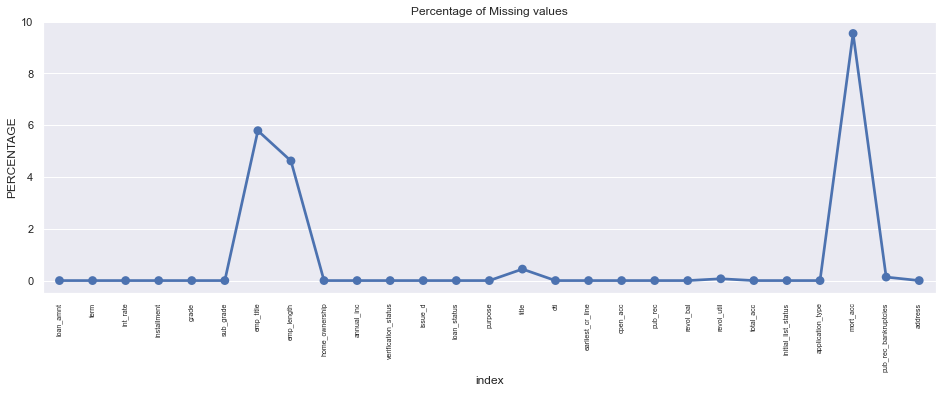

In [139]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<AxesSubplot:>

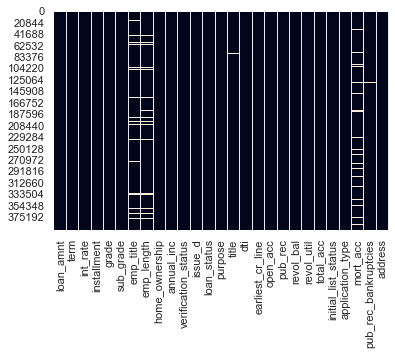

In [140]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

In [141]:
print("Here are the columnn names of our data set :")
data.columns

Here are the columnn names of our data set :


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [142]:
data.loan_status.value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

**There are two categories present in our target column first one is fully paid and it has 318357 observations and second one is charged off and it has 77673 observations**

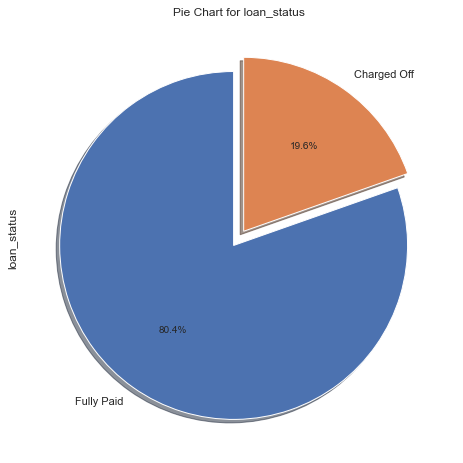

In [143]:
#To get the pie chart to analyze loan_status
data ['loan_status'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for loan_status')
plt.show()

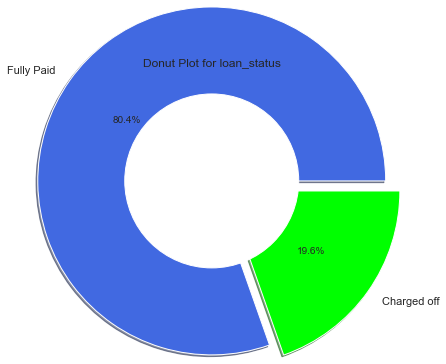

In [144]:
#To get the Donut Plot to analyze loan_status
data1 = data['loan_status'].value_counts()
explode = (0, 0.2)
plt.pie(data1, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Fully Paid','Charged off'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for loan_status')
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

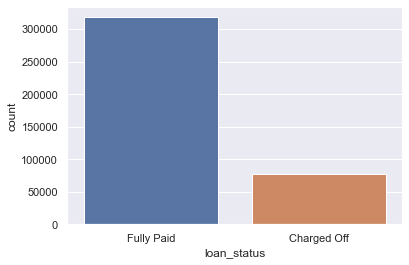

In [145]:
#let's see loan_status by using countplot
sns.countplot(x=data.loan_status)

#### **Let's Analysis the loan_amount column**

In [146]:
data.loan_amnt.value_counts()

10000.0    27668
12000.0    21366
15000.0    19903
20000.0    18969
35000.0    14576
           ...  
37450.0        1
36775.0        1
725.0          1
36225.0        1
35475.0        1
Name: loan_amnt, Length: 1397, dtype: int64

In [147]:
data.loan_amnt.nunique()

1397

There are 1397 unique values present in the loaln amount column in our data

<AxesSubplot:xlabel='loan_amnt', ylabel='count'>

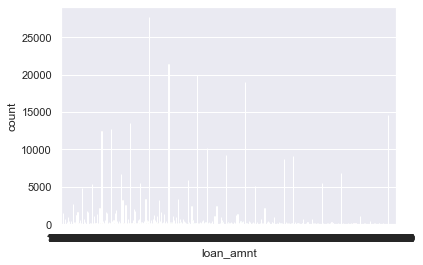

In [148]:
#let's see loan_amnt by using countplot
sns.countplot(x=data.loan_amnt)

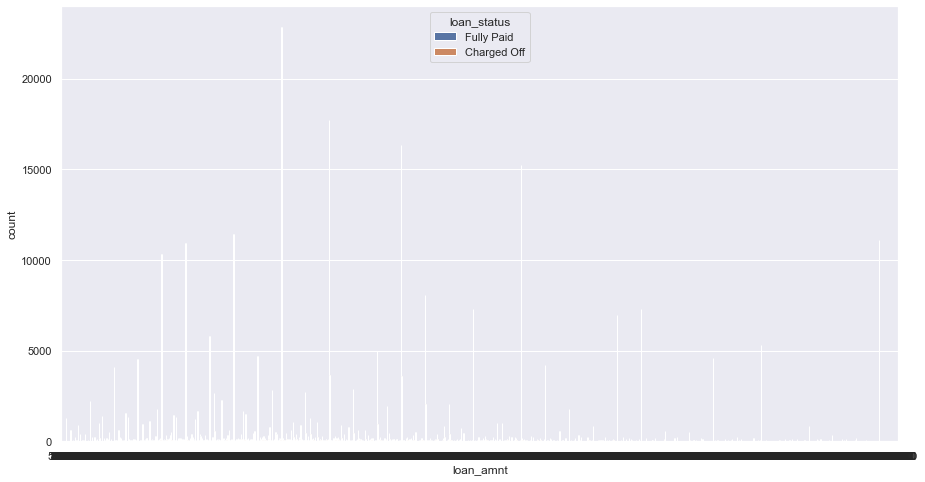

In [149]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='loan_amnt', hue="loan_status", data=data)
plt.show()

In [150]:
import hvplot.pandas
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (loan_status)

<AxesSubplot:>

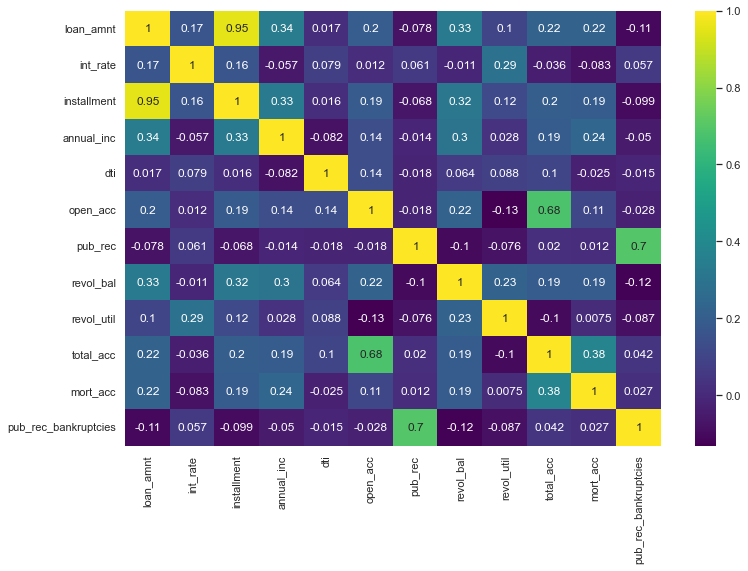

In [151]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [152]:

installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [153]:
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = data.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status by Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

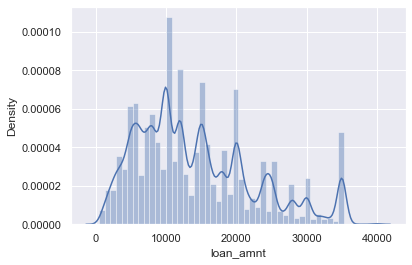

In [154]:
#  distribution plot for loan_amnt column
sns.distplot(data['loan_amnt'])

**Most of the people applied the loan for 10000 rupees.**

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

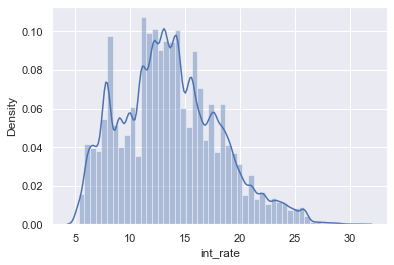

In [155]:
#  distribution plot for int_rate column
sns.distplot(data['int_rate'])

**Intrest rate for maximum loan is 10-15%**

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='installment', ylabel='Density'>

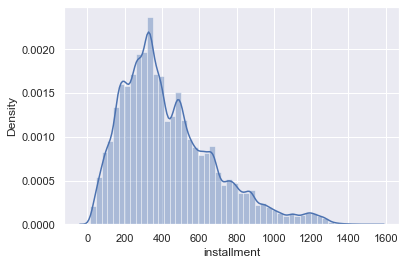

In [156]:
#  distribution plot for instllment column
sns.distplot(data['installment'])

**From the above it is clearly seen that the installment amount for most of the person is 200-500 rupees**

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

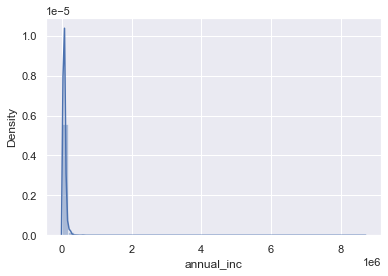

In [157]:
#  distribution plot for annual_inc column
sns.distplot(data['annual_inc'])

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

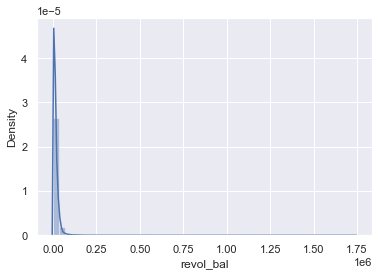

In [158]:
#  distribution plot for revol_bal column
sns.distplot(data['revol_bal'])

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_util', ylabel='Density'>

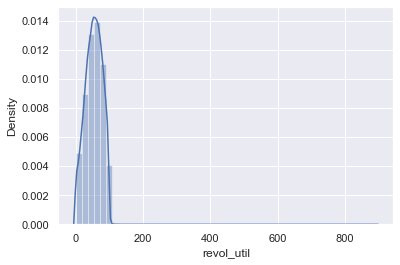

In [159]:
#  distribution plot for revol_util column
sns.distplot(data['revol_util'])

c:\Program Files\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_acc', ylabel='Density'>

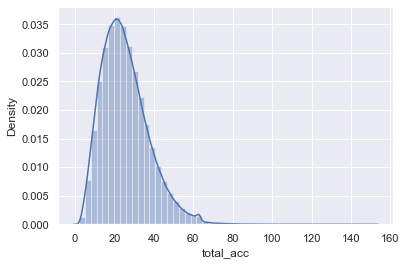

In [160]:
#  distribution plot for total_acc column
sns.distplot(data['total_acc'])

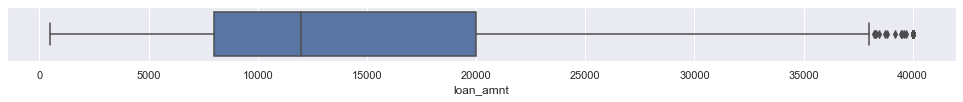

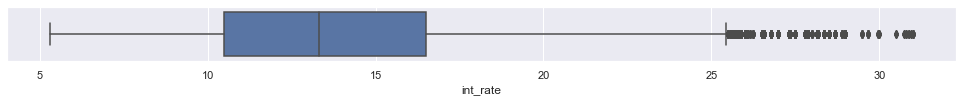

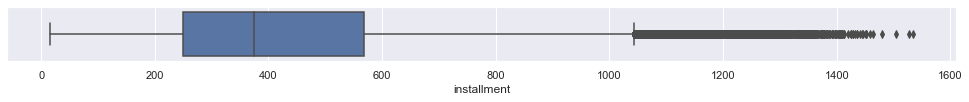

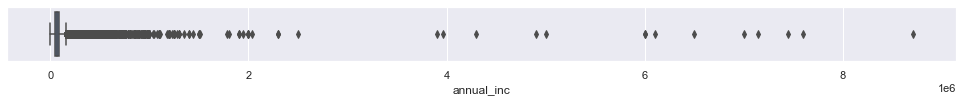

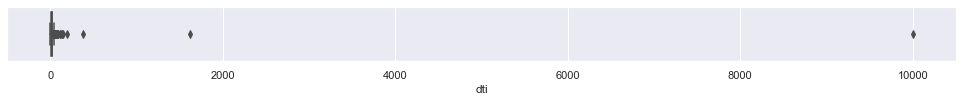

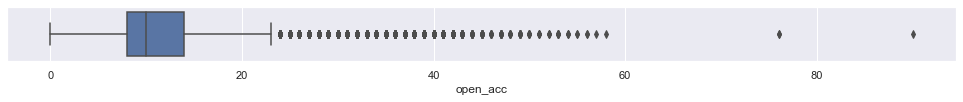

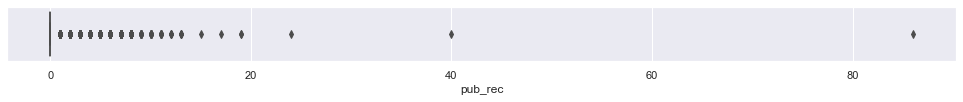

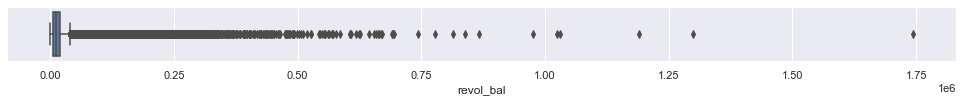

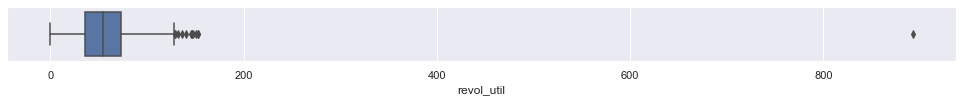

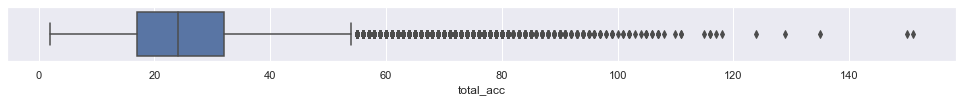

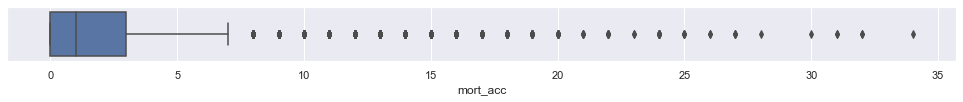

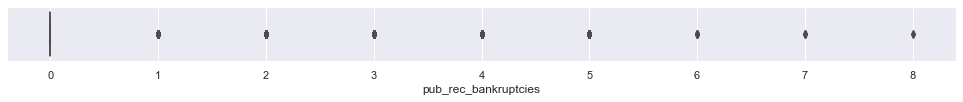

In [161]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

c:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 1224x72 with 0 Axes>

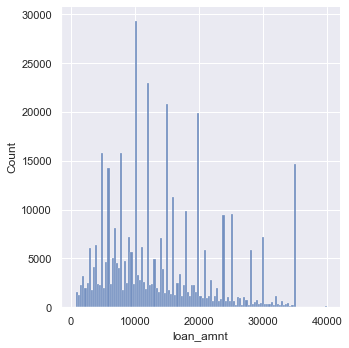

<Figure size 1224x72 with 0 Axes>

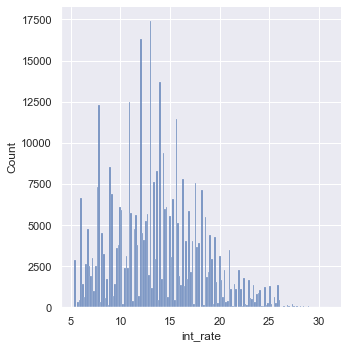

<Figure size 1224x72 with 0 Axes>

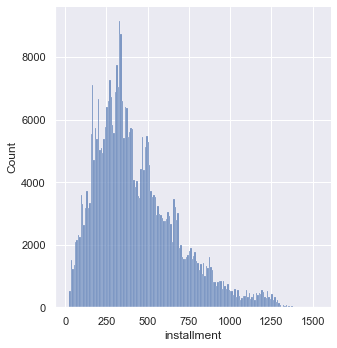

<Figure size 1224x72 with 0 Axes>

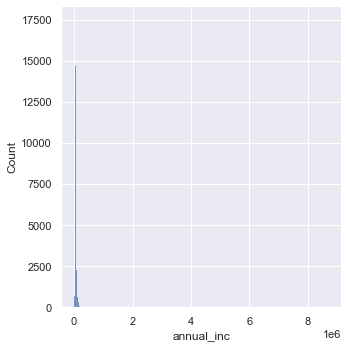

<Figure size 1224x72 with 0 Axes>

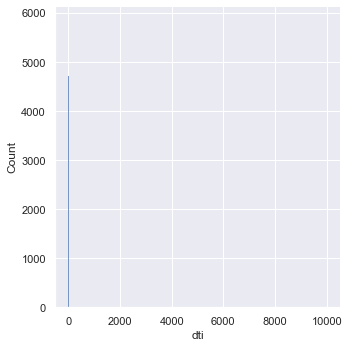

<Figure size 1224x72 with 0 Axes>

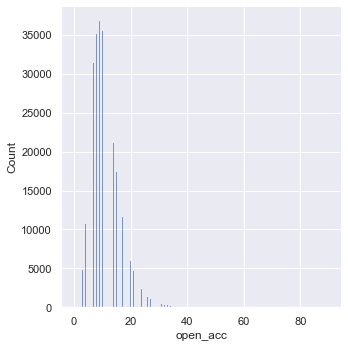

<Figure size 1224x72 with 0 Axes>

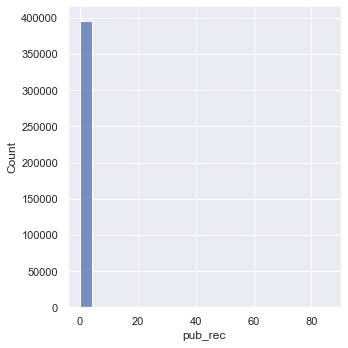

<Figure size 1224x72 with 0 Axes>

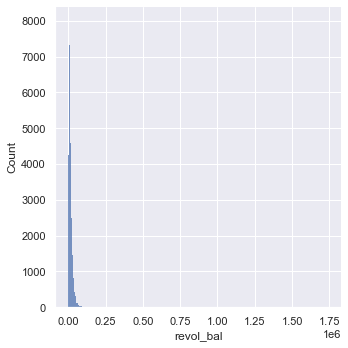

<Figure size 1224x72 with 0 Axes>

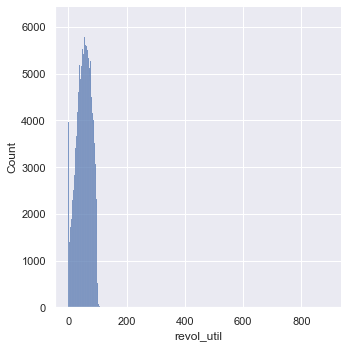

<Figure size 1224x72 with 0 Axes>

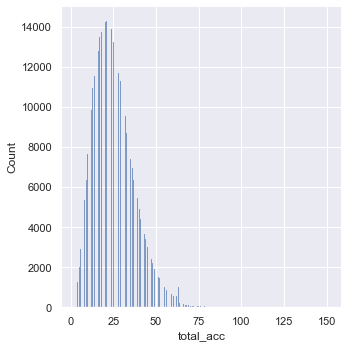

<Figure size 1224x72 with 0 Axes>

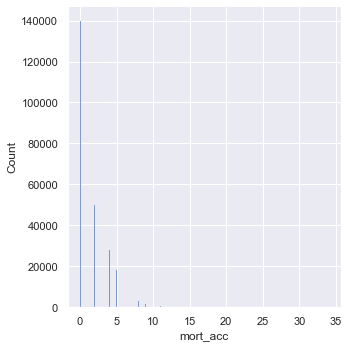

<Figure size 1224x72 with 0 Axes>

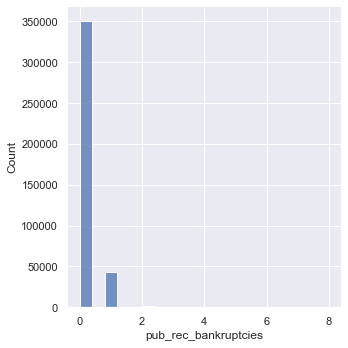

In [162]:
#Printing displot for each numerical column present in the data set
df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.displot(data=df1, x=column)
plt.show()

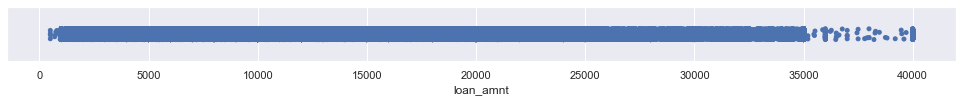

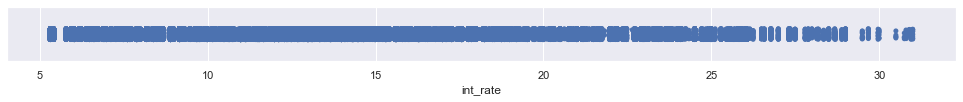

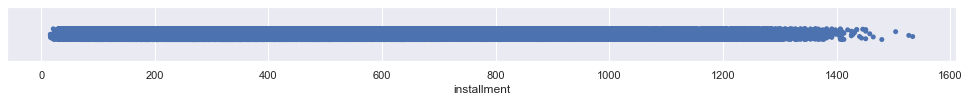

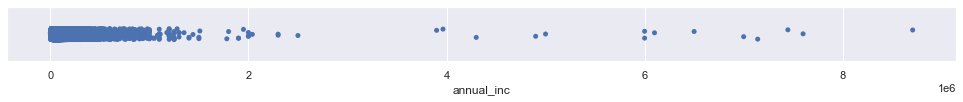

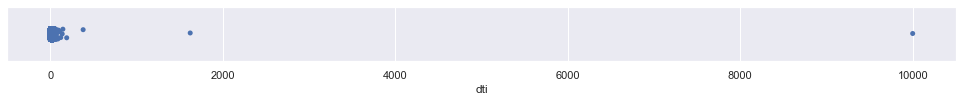

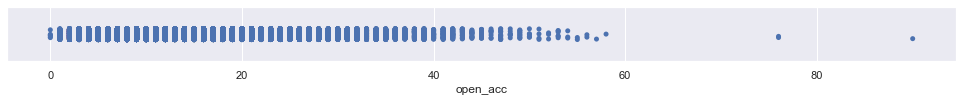

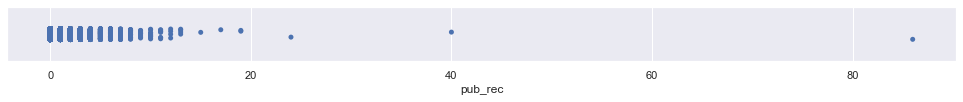

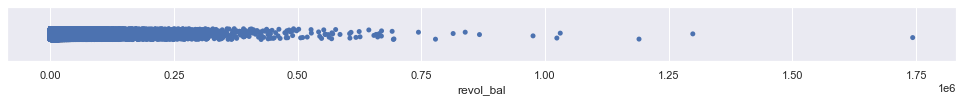

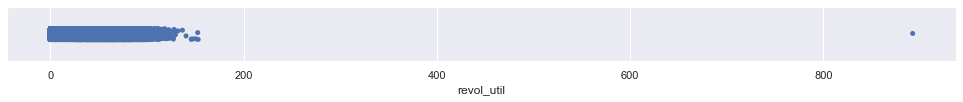

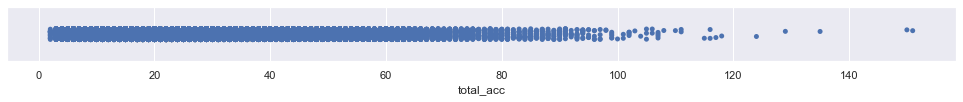

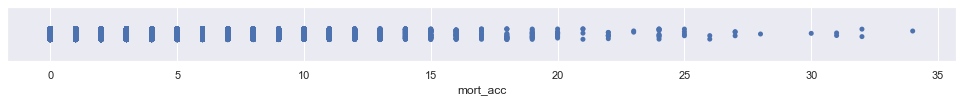

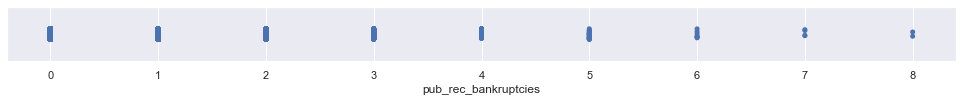

In [163]:
#Printing strip plot for each numerical column present in the data set
df1=data.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

In [164]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [165]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<AxesSubplot:>

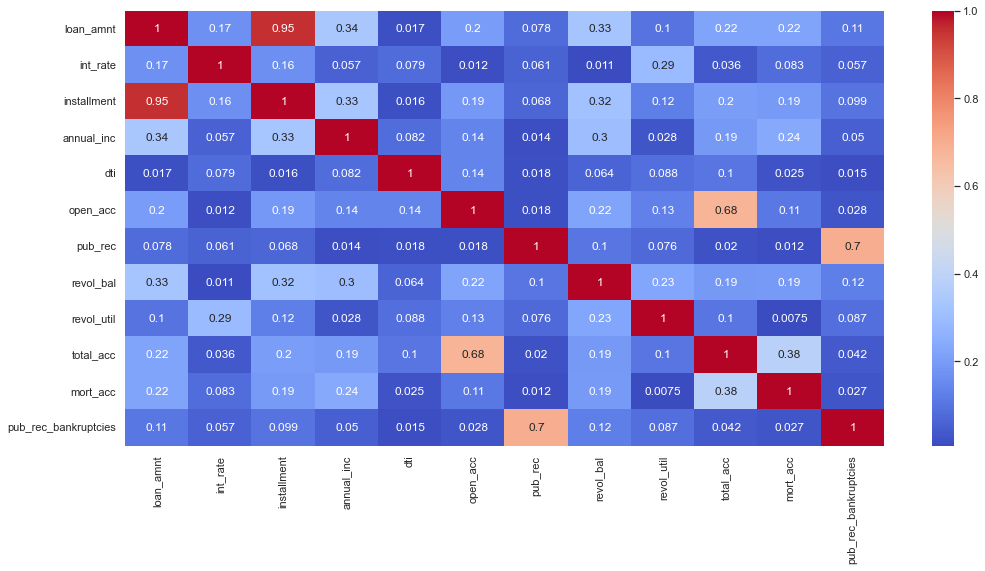

In [166]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'mort_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>]],
      dtype=object)

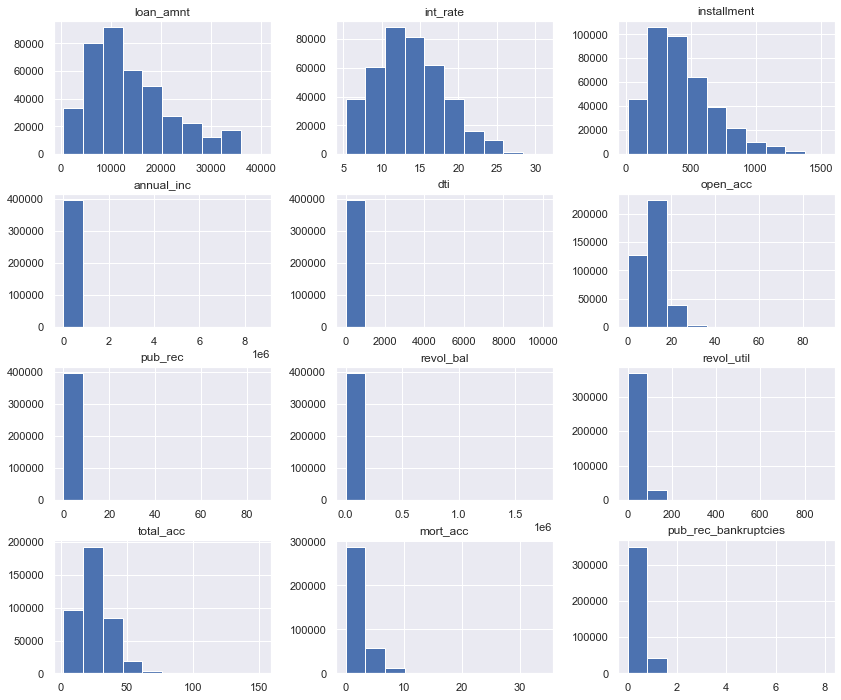

In [167]:
data.hist(figsize = (14,12)) #shows graphically the value counts of each column 

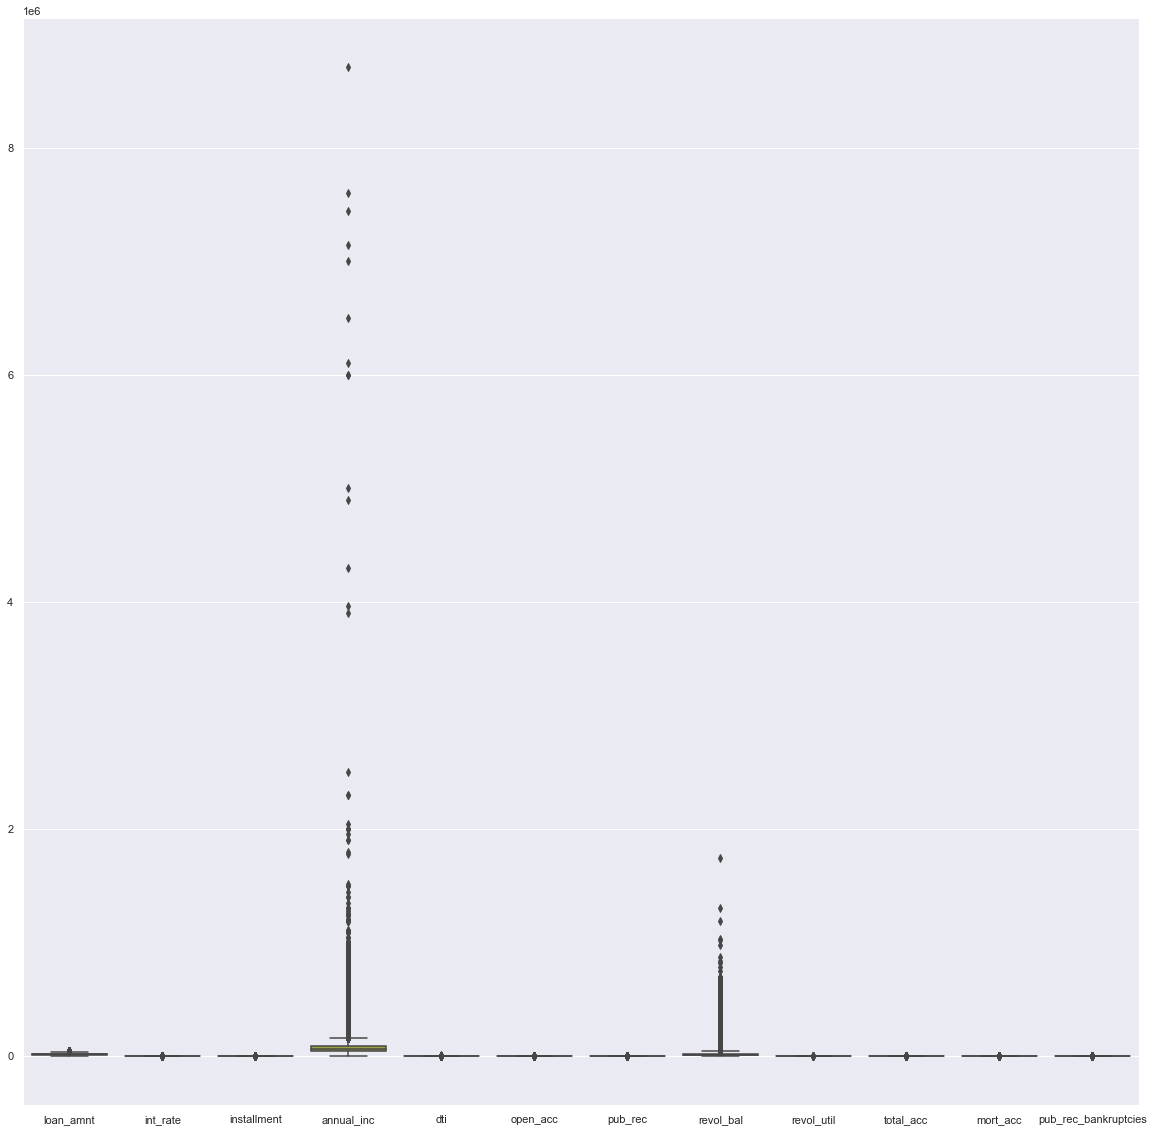

In [168]:
#box plot
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=data)

# **Data Preprocessing**

#### **Missing Value Imputation**

In [169]:
#checking for the null values in the dataset
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [170]:
data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

**Let's impute the missing values in our dataset**

In [171]:
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace = True)
data['emp_length'].fillna(data['emp_length'].mode()[0], inplace = True)
data['title'].fillna(data['title'].mode()[0], inplace = True)

In [172]:
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].mean())
data['mort_acc'] = data['mort_acc'].fillna(data['mort_acc'].mean())
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mean())

In [173]:
print("After the null value imputation the number of missing value count is :")
data.isnull().sum()

After the null value imputation the number of missing value count is :


loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

c:\Program Files\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


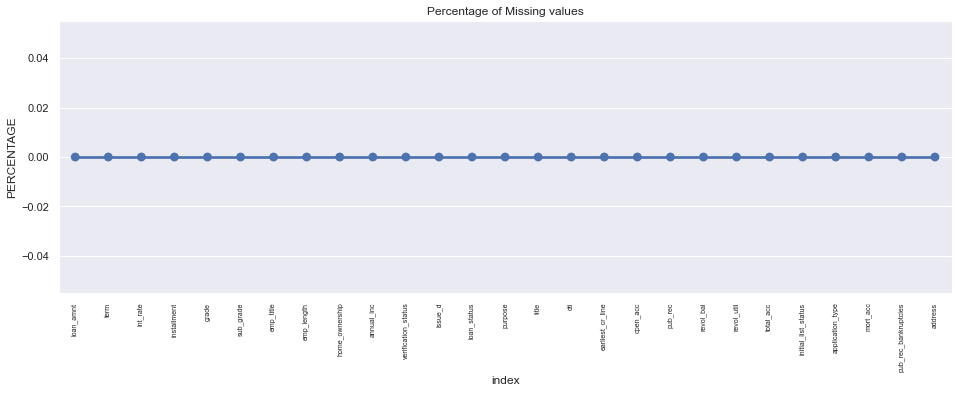

In [174]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<AxesSubplot:>

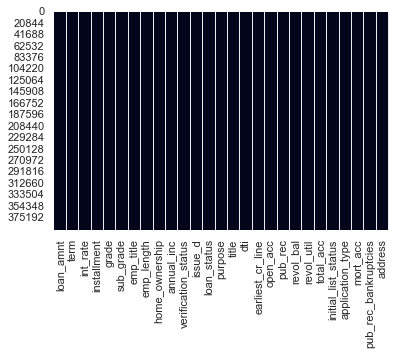

In [175]:
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

**After Null value Imputation there are no missing value present in our data.**

#### **Labelencoding of Categorical Features**

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [177]:
data['term'] = le.fit_transform(data['term'])
data['grade'] = le.fit_transform(data['grade'])
data['sub_grade'] = le.fit_transform(data['sub_grade'])
data['emp_title'] = le.fit_transform(data['emp_title'])
data['emp_length'] = le.fit_transform(data['emp_length'])
data['home_ownership'] = le.fit_transform(data['home_ownership'])
data['verification_status'] = le.fit_transform(data['verification_status'])
data['issue_d'] = le.fit_transform(data['issue_d'])
data['loan_status'] = le.fit_transform(data['loan_status'])
data['purpose'] = le.fit_transform(data['purpose'])
data['title'] = le.fit_transform(data['title'])
data['earliest_cr_line'] = le.fit_transform(data['earliest_cr_line'])
data['initial_list_status'] = le.fit_transform(data['initial_list_status'])
data['application_type'] = le.fit_transform(data['application_type'])
data['address'] = le.fit_transform(data['address'])

In [178]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,1,8,80956,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,6206
1,8000.0,0,11.99,265.68,1,9,33317,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,38135
2,15600.0,0,10.49,506.97,1,7,127182,10,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,307942
3,7200.0,0,6.49,220.65,0,1,27760,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,291181
4,24375.0,1,17.27,609.33,2,14,38300,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,240127


In [179]:
data.dtypes

loan_amnt               float64
term                      int32
int_rate                float64
installment             float64
grade                     int32
sub_grade                 int32
emp_title                 int32
emp_length                int32
home_ownership            int32
annual_inc              float64
verification_status       int32
issue_d                   int32
loan_status               int32
purpose                   int32
title                     int32
dti                     float64
earliest_cr_line          int32
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status       int32
application_type          int32
mort_acc                float64
pub_rec_bankruptcies    float64
address                   int32
dtype: object

**Here after applying the Label Encoder all the categorical columns has been converted into numeric.**

#### **Feature Selection**

Let's plot the correlation plot to select the features 

<AxesSubplot:>

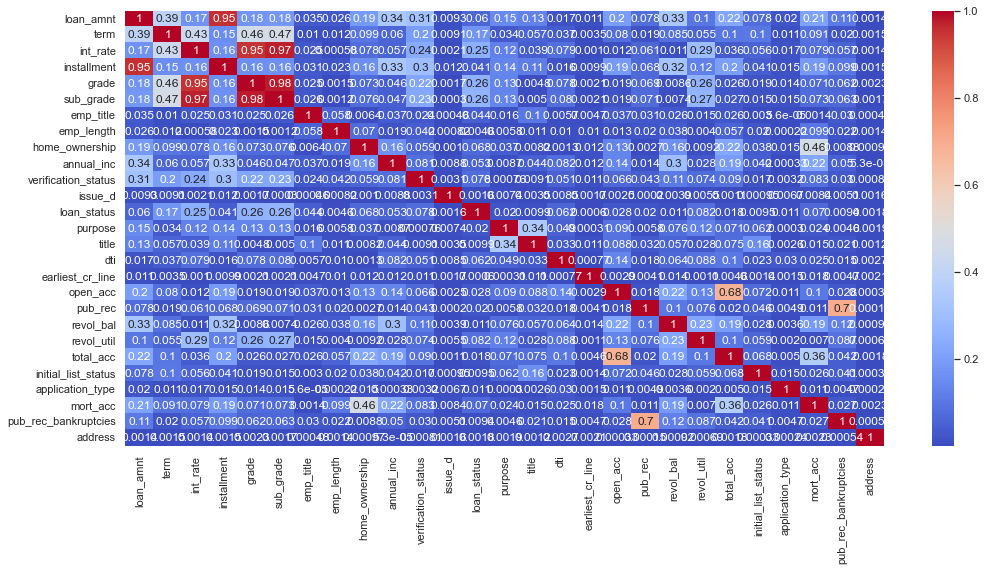

In [180]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Let's save the correlation value in csv format 

In [181]:
corr = data.corr()

In [182]:
corr

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
loan_amnt,1.000000,0.393862,0.168921,0.953929,0.175198,0.181908,-0.035020,-0.025685,-0.187771,0.336887,...,0.198556,-0.077779,0.328320,0.099862,0.223886,0.077743,0.019903,0.212167,-0.106477,0.001405
term,0.393862,1.000000,0.434594,0.153378,0.457524,0.468208,-0.010318,-0.011767,-0.099195,0.060330,...,0.079575,-0.018758,0.084787,0.055150,0.101346,0.104799,0.010504,0.091293,-0.019822,-0.001525
int_rate,0.168921,0.434594,1.000000,0.162758,0.952473,0.974217,0.025344,-0.000583,0.078035,-0.056771,...,0.011649,0.060986,-0.011280,0.293548,-0.036404,-0.056161,-0.017124,-0.079115,0.057423,-0.001391
installment,0.953929,0.153378,0.162758,1.000000,0.157322,0.163453,-0.031353,-0.023228,-0.157975,0.330381,...,0.188973,-0.067892,0.316455,0.123851,0.202430,0.040731,0.015213,0.185117,-0.098566,0.001507
grade,0.175198,0.457524,0.952473,0.157322,1.000000,0.977575,0.025104,-0.001540,0.072621,-0.045862,...,0.019321,0.068778,-0.008639,0.258829,-0.025932,-0.018811,-0.013820,-0.071132,0.061543,-0.002269
sub_grade,0.181908,0.468208,0.974217,0.163453,0.977575,1.000000,0.025928,-0.001189,0.075583,-0.046798,...,0.019105,0.070811,-0.007398,0.269135,-0.026958,-0.014506,-0.014604,-0.073202,0.063246,-0.001748
emp_title,-0.035020,-0.010318,0.025344,-0.031353,0.025104,0.025928,1.000000,-0.057522,-0.006383,-0.036773,...,-0.037194,0.031030,-0.025643,-0.014577,-0.026151,0.002959,0.000056,0.001370,0.029552,0.000476
emp_length,-0.025685,-0.011767,-0.000583,-0.023228,-0.001540,-0.001189,-0.057522,1.000000,0.070424,-0.018821,...,-0.013034,-0.020025,-0.038277,-0.003962,-0.056921,-0.020321,-0.000224,-0.098643,-0.022076,0.001368
home_ownership,-0.187771,-0.099195,0.078035,-0.157975,0.072621,0.075583,-0.006383,0.070424,1.000000,-0.162512,...,-0.132056,0.002729,-0.159369,-0.009237,-0.222933,-0.037551,-0.015336,-0.461672,0.008808,-0.000972
annual_inc,0.336887,0.060330,-0.056771,0.330381,-0.045862,-0.046798,-0.036773,-0.018821,-0.162512,1.000000,...,0.136150,-0.013720,0.299773,0.027855,0.193023,0.041752,-0.000335,0.223975,-0.050075,0.000053


In [183]:
corr.to_csv('correlation.csv')

In [184]:
import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()

In [185]:
corr_matrix

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
loan_amnt,1.000000,0.393862,0.168921,0.953929,0.175198,0.181908,0.035020,0.025685,0.187771,0.336887,...,0.198556,0.077779,0.328320,0.099862,0.223886,0.077743,0.019903,0.212167,0.106477,0.001405
term,0.393862,1.000000,0.434594,0.153378,0.457524,0.468208,0.010318,0.011767,0.099195,0.060330,...,0.079575,0.018758,0.084787,0.055150,0.101346,0.104799,0.010504,0.091293,0.019822,0.001525
int_rate,0.168921,0.434594,1.000000,0.162758,0.952473,0.974217,0.025344,0.000583,0.078035,0.056771,...,0.011649,0.060986,0.011280,0.293548,0.036404,0.056161,0.017124,0.079115,0.057423,0.001391
installment,0.953929,0.153378,0.162758,1.000000,0.157322,0.163453,0.031353,0.023228,0.157975,0.330381,...,0.188973,0.067892,0.316455,0.123851,0.202430,0.040731,0.015213,0.185117,0.098566,0.001507
grade,0.175198,0.457524,0.952473,0.157322,1.000000,0.977575,0.025104,0.001540,0.072621,0.045862,...,0.019321,0.068778,0.008639,0.258829,0.025932,0.018811,0.013820,0.071132,0.061543,0.002269
sub_grade,0.181908,0.468208,0.974217,0.163453,0.977575,1.000000,0.025928,0.001189,0.075583,0.046798,...,0.019105,0.070811,0.007398,0.269135,0.026958,0.014506,0.014604,0.073202,0.063246,0.001748
emp_title,0.035020,0.010318,0.025344,0.031353,0.025104,0.025928,1.000000,0.057522,0.006383,0.036773,...,0.037194,0.031030,0.025643,0.014577,0.026151,0.002959,0.000056,0.001370,0.029552,0.000476
emp_length,0.025685,0.011767,0.000583,0.023228,0.001540,0.001189,0.057522,1.000000,0.070424,0.018821,...,0.013034,0.020025,0.038277,0.003962,0.056921,0.020321,0.000224,0.098643,0.022076,0.001368
home_ownership,0.187771,0.099195,0.078035,0.157975,0.072621,0.075583,0.006383,0.070424,1.000000,0.162512,...,0.132056,0.002729,0.159369,0.009237,0.222933,0.037551,0.015336,0.461672,0.008808,0.000972
annual_inc,0.336887,0.060330,0.056771,0.330381,0.045862,0.046798,0.036773,0.018821,0.162512,1.000000,...,0.136150,0.013720,0.299773,0.027855,0.193023,0.041752,0.000335,0.223975,0.050075,0.000053


In [186]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
loan_amnt,NaN,0.393862,0.168921,0.953929,0.175198,0.181908,0.035020,0.025685,0.187771,0.336887,...,0.198556,0.077779,0.328320,0.099862,0.223886,0.077743,0.019903,0.212167,0.106477,0.001405
term,NaN,NaN,0.434594,0.153378,0.457524,0.468208,0.010318,0.011767,0.099195,0.060330,...,0.079575,0.018758,0.084787,0.055150,0.101346,0.104799,0.010504,0.091293,0.019822,0.001525
int_rate,NaN,NaN,NaN,0.162758,0.952473,0.974217,0.025344,0.000583,0.078035,0.056771,...,0.011649,0.060986,0.011280,0.293548,0.036404,0.056161,0.017124,0.079115,0.057423,0.001391
installment,NaN,NaN,NaN,NaN,0.157322,0.163453,0.031353,0.023228,0.157975,0.330381,...,0.188973,0.067892,0.316455,0.123851,0.202430,0.040731,0.015213,0.185117,0.098566,0.001507
grade,NaN,NaN,NaN,NaN,NaN,0.977575,0.025104,0.001540,0.072621,0.045862,...,0.019321,0.068778,0.008639,0.258829,0.025932,0.018811,0.013820,0.071132,0.061543,0.002269
sub_grade,NaN,NaN,NaN,NaN,NaN,NaN,0.025928,0.001189,0.075583,0.046798,...,0.019105,0.070811,0.007398,0.269135,0.026958,0.014506,0.014604,0.073202,0.063246,0.001748
emp_title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057522,0.006383,0.036773,...,0.037194,0.031030,0.025643,0.014577,0.026151,0.002959,0.000056,0.001370,0.029552,0.000476
emp_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070424,0.018821,...,0.013034,0.020025,0.038277,0.003962,0.056921,0.020321,0.000224,0.098643,0.022076,0.001368
home_ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162512,...,0.132056,0.002729,0.159369,0.009237,0.222933,0.037551,0.015336,0.461672,0.008808,0.000972
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.136150,0.013720,0.299773,0.027855,0.193023,0.041752,0.000335,0.223975,0.050075,0.000053


In [187]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.30)]

In [188]:
to_drop

['term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'annual_inc',
 'verification_status',
 'title',
 'revol_bal',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

So here as per the correlation values we have selected the above features to train our model

In [189]:

final_data = data[['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc', 'verification_status', 'title', 'revol_bal',
                     'total_acc', 'mort_acc', 'pub_rec_bankruptcies','loan_status']]

In [190]:
final_data.head()

,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,title,revol_bal,total_acc,mort_acc,pub_rec_bankruptcies,loan_status
0,0,11.44,329.48,1,8,117000.0,0,36961,36369.0,25.0,0.0,0.0,1
1,0,11.99,265.68,1,9,65000.0,0,12926,20131.0,27.0,3.0,0.0,1
2,0,10.49,506.97,1,7,43057.0,1,10159,11987.0,26.0,0.0,0.0,1
3,0,6.49,220.65,0,1,54000.0,0,10159,5472.0,13.0,0.0,0.0,1
4,1,17.27,609.33,2,14,55000.0,2,9268,24584.0,43.0,1.0,0.0,0


In [191]:
final_data.shape

(396030, 13)

In [192]:
final_data.columns

Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'annual_inc',
       'verification_status', 'title', 'revol_bal', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

#### **Splitting of data into train and test**

In [193]:
x = final_data.drop(['loan_status'], axis=1)
y = final_data['loan_status']

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,stratify=y, random_state= 42)  

In [195]:
x_test

,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,title,revol_bal,total_acc,mort_acc,pub_rec_bankruptcies
23128,0,12.99,673.79,2,10,80000.0,2,12926,9802.0,37.0,1.0,0.0
218503,0,18.25,798.12,3,17,84840.0,1,12926,3400.0,16.0,1.0,0.0
298012,1,16.24,711.38,2,14,65000.0,2,10159,28182.0,30.0,3.0,0.0
218185,0,7.90,125.17,0,3,14700.0,2,5635,561.0,18.0,0.0,1.0
243494,1,26.57,579.84,5,29,54000.0,0,12926,20863.0,20.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
274299,0,9.76,900.33,1,5,75000.0,2,2723,24707.0,35.0,0.0,0.0
193796,0,13.33,379.16,2,12,74000.0,2,12926,13337.0,30.0,1.0,0.0
45257,0,17.76,180.17,3,15,63180.0,2,41102,4368.0,27.0,0.0,0.0
338012,0,12.29,667.06,2,10,48000.0,1,10159,18854.0,24.0,2.0,0.0


In [196]:
y_test

23128     0
218503    0
298012    1
218185    0
243494    1
         ..
274299    1
193796    1
45257     1
338012    1
379965    1
Name: loan_status, Length: 118809, dtype: int32

# **Model Building**

### **Unsupervised Machine Learning**

#### **K-Means Clustering**

In [197]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [198]:
df = data

In [199]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,1,8,80956,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.000000,0.0,6206
1,8000.0,0,11.99,265.68,1,9,33317,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.000000,0.0,38135
2,15600.0,0,10.49,506.97,1,7,127182,10,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.000000,0.0,307942
3,7200.0,0,6.49,220.65,0,1,27760,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.000000,0.0,291181
4,24375.0,1,17.27,609.33,2,14,38300,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.000000,0.0,240127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,1,8,160365,2,5,40000.0,...,6.0,0.0,1990.0,34.3,23.0,1,1,0.000000,0.0,45846
396026,21000.0,0,12.29,700.42,2,10,5779,5,1,110000.0,...,6.0,0.0,43263.0,95.7,8.0,0,1,1.000000,0.0,4098
396027,5000.0,0,9.99,161.32,1,5,26146,1,5,56500.0,...,15.0,0.0,32704.0,66.9,23.0,0,1,0.000000,0.0,337236
396028,21000.0,1,15.31,503.02,2,11,56712,1,1,64000.0,...,9.0,0.0,15704.0,53.8,20.0,0,1,5.000000,0.0,277498


In [200]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0,11.44,329.48,1,8,80956,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,6206
1,8000.0,0,11.99,265.68,1,9,33317,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,38135
2,15600.0,0,10.49,506.97,1,7,127182,10,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,307942
3,7200.0,0,6.49,220.65,0,1,27760,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,291181
4,24375.0,1,17.27,609.33,2,14,38300,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,240127


In [201]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [202]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df)

In [203]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[542213.1476125409,
 477223.40695871133,
 446609.1386715062,
 421795.1320313659,
 397756.58629145415,
 384017.13548153045,
 371376.4906578459]

Text(0, 0.5, 'total_within_SS')

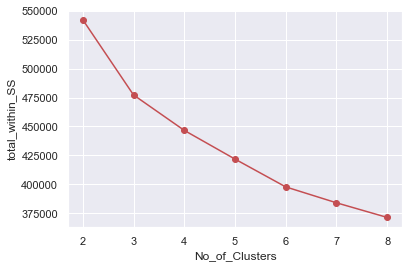

In [204]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [205]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [206]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

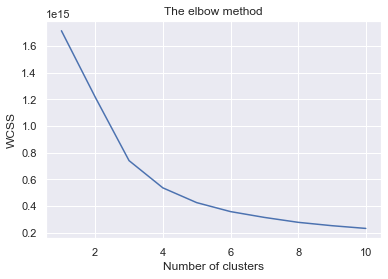

In [207]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [208]:
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(df)
pred = kmeans.predict(df)

c:\Program Files\Python36\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [209]:
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    129983
1    129204
2    127518
0      9311
3        14
Name: cluster, dtype: int64

#### **Principle Component Analysis**

In [210]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [211]:
# Normalizing the numerical data 
uni_normal = scale(df)
uni_normal

array([[-0.49224315, -0.55797482, -0.49179907, ..., -0.34177078,
        -1.67965479, -0.9980635 ],
       [-0.73155115, -0.55797482, -0.36881576, ..., -0.34177078,
        -1.39987276, -0.9980635 ],
       [ 0.17781923, -0.55797482, -0.70422477, ..., -0.34177078,
         0.96434622,  1.33532217],
       ...,
       [-1.09051314, -0.55797482, -0.81602778, ..., -0.34177078,
         1.22103871,  1.33532217],
       [ 0.82395082,  1.79219555,  0.37355619, ..., -0.34177078,
         0.69757671,  1.33532217],
       [-1.44947513, -0.55797482, -0.00657403, ..., -0.34177078,
         0.70621666,  1.33532217]])

In [212]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [213]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.13548002, 0.10816865, 0.06739206, 0.0650981 , 0.0520668 ,
       0.05072751])

In [214]:
# PCA weights
pca.components_
pca.components_[0]

array([ 0.30983362,  0.31733284,  0.42876815,  0.28141197,  0.43068043,
        0.43632138,  0.00157273, -0.01914115, -0.05185014,  0.09408511,
        0.22002666, -0.00145122, -0.15728278,  0.00245624, -0.03966804,
        0.06631773, -0.00437569,  0.10583029,  0.00808667,  0.13154751,
        0.17223266,  0.10068395,  0.01864231, -0.00236445,  0.06383006,
       -0.00255333, -0.00769557, -0.02199359])

In [215]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([13.55, 24.37, 31.11, 37.62, 42.83, 47.9 ])

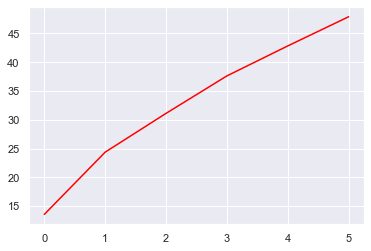

In [216]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [217]:
# PCA scores
pca_values

array([[-1.35267114, -0.1919119 , -2.18845125, -0.1101204 , -2.73281469,
         0.41259738],
       [-1.23501458,  0.9110869 , -1.55863104,  0.20167155, -0.50897973,
         1.23728015],
       [-0.91642782, -0.04158938,  1.50998321, -1.44064598,  1.4880881 ,
         0.29692211],
       ...,
       [-1.69407401, -0.56432706,  1.53931783, -1.04694235, -1.38981618,
         0.08600569],
       [ 1.2711472 ,  0.67499193,  1.42789204, -0.59213097, -0.91867145,
        -1.3166685 ],
       [-1.09358331, -2.34560796,  1.02623555, -1.25151253, -0.80723952,
        -1.09938426]])

In [248]:
len(pca_values)

396030

In [249]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([df, pca_data.iloc[:, 0:5]], axis = 1)

In [247]:
final

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,cluster,comp0,comp1,comp2
0,10000.0,0,11.44,329.48,1,8,80956,1,5,117000.0,...,25.0,1,1,0.000000,0.0,6206,1,-1.352671,-0.191912,-2.188451
1,8000.0,0,11.99,265.68,1,9,33317,4,1,65000.0,...,27.0,0,1,3.000000,0.0,38135,1,-1.235015,0.911087,-1.558631
2,15600.0,0,10.49,506.97,1,7,127182,10,5,43057.0,...,26.0,0,1,0.000000,0.0,307942,4,-0.916428,-0.041589,1.509983
3,7200.0,0,6.49,220.65,0,1,27760,6,5,54000.0,...,13.0,0,1,0.000000,0.0,291181,4,-3.725179,-0.643337,1.253838
4,24375.0,1,17.27,609.33,2,14,38300,9,1,55000.0,...,43.0,0,1,1.000000,0.0,240127,2,2.714027,0.976483,0.355339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,1,8,160365,2,5,40000.0,...,23.0,1,1,0.000000,0.0,45846,1,-1.085811,-0.852096,-1.687751
396026,21000.0,0,12.29,700.42,2,10,5779,5,1,110000.0,...,8.0,0,1,1.000000,0.0,4098,1,0.483487,0.883254,-2.196988
396027,5000.0,0,9.99,161.32,1,5,26146,1,5,56500.0,...,23.0,0,1,0.000000,0.0,337236,4,-1.694074,-0.564327,1.539318
396028,21000.0,1,15.31,503.02,2,11,56712,1,1,64000.0,...,20.0,0,1,5.000000,0.0,277498,4,1.271147,0.674992,1.427892


### **Supervised Machine Learning**

#### **Artificial Neural Network (ANN)**

In [219]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [220]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 385
Trainable params: 385
Non-trainable params: 0
________________________________________________________

In [221]:
# fit the model to the training data
history=model.fit(x_train, y_train,epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
8664/8664 [==============================] - 8s 914us/step - loss: 0.4998 - accuracy: 0.8038 - val_loss: 0.4911 - val_accuracy: 0.8039
Epoch 2/10
8664/8664 [==============================] - 8s 908us/step - loss: 0.4938 - accuracy: 0.8039 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 3/10
8664/8664 [==============================] - 8s 896us/step - loss: 0.4950 - accuracy: 0.8039 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 4/10
8664/8664 [==============================] - 7s 853us/step - loss: 0.4950 - accuracy: 0.8039 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 5/10
8664/8664 [==============================] - 8s 914us/step - loss: 0.4950 - accuracy: 0.8039 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 6/10
8664/8664 [==============================] - 8s 893us/step - loss: 0.4950 - accuracy: 0.8039 - val_loss: 0.4950 - val_accuracy: 0.8039
Epoch 7/10
8664/8664 [==============================] - 8s 886us/step - loss: 0.4950 - accuracy: 0.8039 - val_loss: 0.4950 -

In [222]:
y_pred = model.predict(x_test)

In [223]:
acc_ann = np.mean(history.history['val_accuracy'])
# print("\n%s: %.2f%%" % ('ann_acc', acc_ann*100))
acc_ann = acc_ann*100
print('The accuracy obtained by ANN model :',acc_ann)

The accuracy obtained by ANN model : 80.38700819015503


In [224]:
from sklearn.metrics import confusion_matrix
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

**MODEL EVALUATION**

In [225]:
y_pred = model.predict(x_test)
evaluate_nn(y_test, y_pred.round(), train=False)

c:\Program Files\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 80.39%
_______________________________________________
CLASSIFICATION REPORT:
                 0             1  accuracy      macro avg   weighted avg
precision      0.0      0.803870   0.80387       0.401935       0.646207
recall         0.0      1.000000   0.80387       0.500000       0.803870
f1-score       0.0      0.891273   0.80387       0.445636       0.716467
support    23302.0  95507.000000   0.80387  118809.000000  118809.000000
_______________________________________________
Confusion Matrix: 
 [[    0 23302]
 [    0 95507]]



In [226]:
from tensorflow.keras.metrics import AUC

In [227]:
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['accuracy'], label='accuracy')
    plt.plot(r.history['val_accuracy'], label='val_accuracy')
    plt.title('accuracy score evolution during trainig')
    plt.legend();

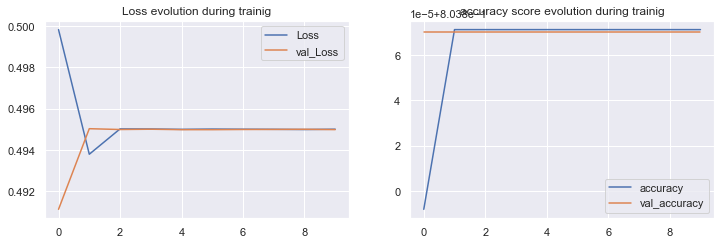

In [228]:
plot_learning_evolution(history)

#### **XGBoost Classifier**

In [229]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100)
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred)*100
print ("The accuracy obtained by the XGBoost classifier is :",acc_xgb,"%")

c:\Program Files\Python36\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy obtained by the XGBoost classifier is : 80.5343029568467 %


In [230]:
#Printing the Classification report for XGBoost classifier model
print('The classificatin report for XGBoost classifier as follows:')
report  = classification_report(y_pred,y_test)
print(report)

The classificatin report for XGBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.07      0.53      0.13      3307
           1       0.98      0.81      0.89    115502

    accuracy                           0.81    118809
   macro avg       0.53      0.67      0.51    118809
weighted avg       0.96      0.81      0.87    118809



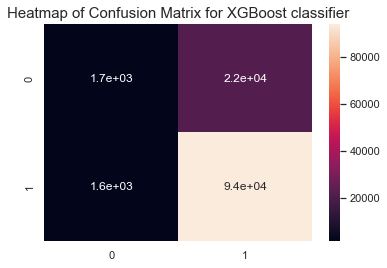

In [231]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for XGBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

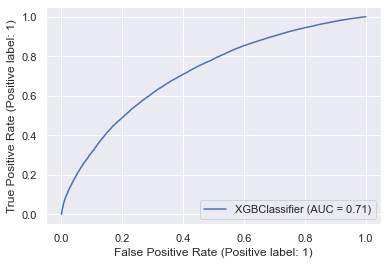

In [232]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(xgb_classifier, x_test, y_test)

#### **AdaBoost Classifier**

In [233]:
from sklearn.ensemble import AdaBoostClassifier

adb_classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
adb_classifier.fit(x_train, y_train)
y_pred = adb_classifier.predict(x_test)
acc_adb = accuracy_score(y_test, y_pred)*100
print ("The accuracy obtained by the AdaBoost classifier is :",acc_adb,"%")

The accuracy obtained by the AdaBoost classifier is : 80.49137691589021 %


In [234]:
#Printing the Classification report for AdaBoost classifier model
print('The classificatin report for AdaBoost classifier as follows:')
report  = classification_report(y_pred,y_test)
print(report)

The classificatin report for AdaBoost classifier as follows:
              precision    recall  f1-score   support

           0       0.04      0.53      0.08      1886
           1       0.99      0.81      0.89    116923

    accuracy                           0.80    118809
   macro avg       0.52      0.67      0.49    118809
weighted avg       0.98      0.80      0.88    118809



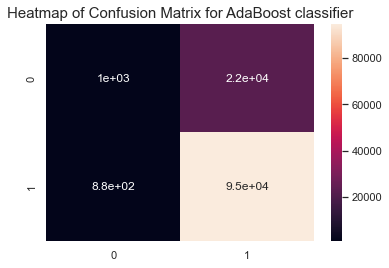

In [235]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for AdaBoost classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

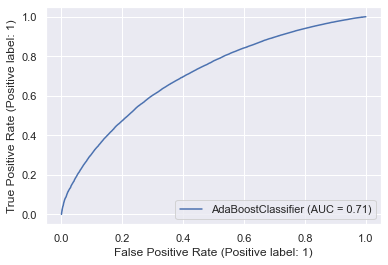

In [236]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(adb_classifier, x_test, y_test)

#### **Gradient Boosting Classifier**

In [237]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100, criterion='friedman_mse')
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
acc_gb = accuracy_score(y_test, y_pred)*100
print ("The accuracy obtained by the Gradient Boosting classifier is :",acc_gb,"%")


The accuracy obtained by the Gradient Boosting classifier is : 80.5612369433292 %


In [238]:
#Printing the Classification report for Gradient Boosting classifier model
print('The classificatin report for Gradient Boosting classifier as follows:')
report  = classification_report(y_pred,y_test)
print(report)

The classificatin report for Gradient Boosting classifier as follows:
              precision    recall  f1-score   support

           0       0.05      0.55      0.10      2235
           1       0.99      0.81      0.89    116574

    accuracy                           0.81    118809
   macro avg       0.52      0.68      0.49    118809
weighted avg       0.97      0.81      0.88    118809



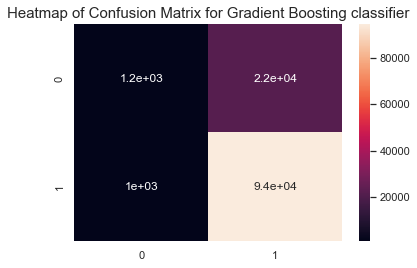

In [239]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for Gradient Boosting classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

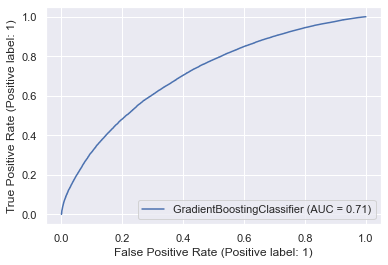

In [240]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(gb_classifier, x_test, y_test)

#### **Naive Bayes Classifier**

In [241]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred = nb_classifier.predict(x_test)
acc_nb = accuracy_score(y_test, y_pred)*100
print ("The accuracy obtained by the Naive Bayes classifier is :",acc_nb,"%")

The accuracy obtained by the Naive Bayes classifier is : 75.8486309959683 %


In [242]:
#Printing the Classification report for Naive Bayes classifier model
print('The classificatin report for Naive Bayes classifier as follows:')
report  = classification_report(y_pred,y_test)
print(report)

The classificatin report for Naive Bayes classifier as follows:
              precision    recall  f1-score   support

           0       0.33      0.37      0.35     20638
           1       0.86      0.84      0.85     98171

    accuracy                           0.76    118809
   macro avg       0.60      0.60      0.60    118809
weighted avg       0.77      0.76      0.76    118809



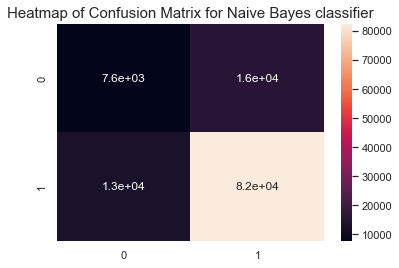

In [243]:
#confustion metrix
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix for Naive Bayes classifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

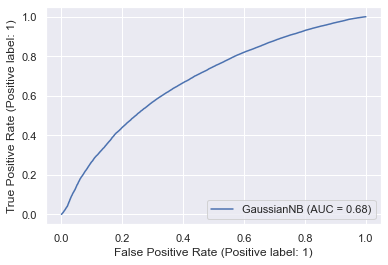

In [244]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(nb_classifier, x_test, y_test)

# **Model Comparison**

**Here we are going to plot a barplot to compare all models.**

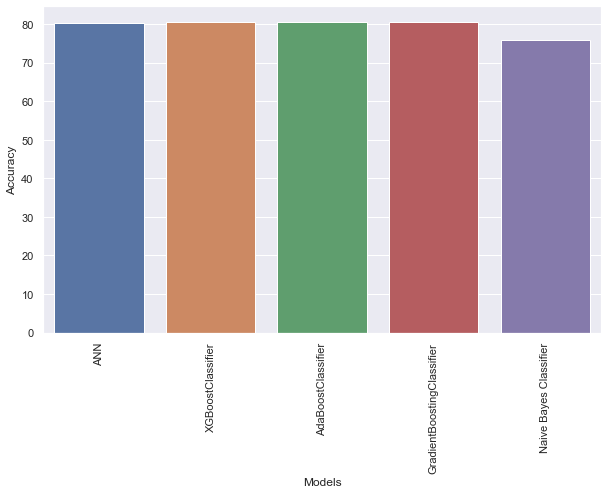

In [245]:
graph = pd.DataFrame({'Models':['ANN','XGBoostClassifier','AdaBoostClassifier','GradientBoostingClassifier','Naive Bayes Classifier'],'Accuracy':[acc_ann,acc_xgb,acc_adb,acc_gb,acc_nb]})
graph


plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()

**From the above it is seen that all the model is giving almost same accuracy but amongs all these xgboost and gradient boosting classifier is giving high accuracy.**

In [246]:
import hvplot
print(hvplot.__version__)

0.8.0
